<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>
<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>
<p style="color: red;">永远不要怀疑自己，快乐地完成工作，快乐地生活</p>

<h1>1.rotated binary search</h1>
<p>升序排列，但找一个中间元素，往后的所有拿下，append进最前面。要求lgn找target，没有返回-1</p>

想到了性质，即Mid一左一右至多有一个是unsorted，其余一个是排序不好的，但在找如何分辨的方法时，卡到了nums[mid]和nums[mid-1]比较，没有考虑还可以和left比较，可以和right比较等等，由于存在Left-1,所以还想了终止条件是r-l<=2，但想到这就得停止了，因为这样太缺乏elegant。此外，还想到了先把pivot找出来，但确信了找只能做Linear search而放弃，其实完全可以也用binary search来找啊！

不要理所应当的用N去思考，直觉只能用一下，之后切换成严谨性思考，搜索只能Linear time吗？确定sorted部分只能用Mid和mid-1比吗？要多一点S而不是N

<h2>Approach 1: Find Pivot Index + Binary Search</h2>

If nums[mid] > nums[-1], it suggests that the pivot value lies on the right of nums[mid]. We will then proceed with the right half of the search space, which is [mid + 1 ~ right].
Otherwise, the pivot value is nums[mid] or it's situated to the left of nums[mid], we continue with the left half of the searching space, which is [left ~ mid - 1].

In [ ]:
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        n = len(nums)
        left, right = 0, n - 1
        
        # Find the index of the pivot element (the smallest element)
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] > nums[-1]:
                left = mid + 1
            else:
                right = mid - 1
        
        # Binary search over an inclusive range [left_boundary ~ right_boundary]
        def binarySearch(left_boundary, right_boundary, target):
            left, right = left_boundary, right_boundary
            while left <= right:
                mid = (left + right) // 2
                if nums[mid] == target:
                    return mid
                elif nums[mid] > target:
                    right = mid - 1
                else:
                    left = mid + 1
            return -1
        
        # Binary search over elements on the pivot element's left
        if (answer := binarySearch(0, left - 1, target)) != -1:
            return answer 
        
        # Binary search over elements on the pivot element's right
        return binarySearch(left, n - 1, target)

<h2>approach 2: one binary search</h2>

<p>If nums[mid] >= nums[left]. It implies that the left subarray nums[left ~ mid] is sorted.</p>

In [ ]:
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        n = len(nums)
        left, right = 0, n - 1
        while left <= right:
            mid = left + (right - left) // 2
            
            # Case 1: find target
            if nums[mid] == target:
                return mid
            
            # Case 2: subarray on mid's left is sorted
            elif nums[mid] >= nums[left]:
                if target >= nums[left] and target < nums[mid]:
                    right = mid - 1
                else:
                    left = mid + 1
                    
            # Case 3: subarray on mid's right is sorted.
            else:
                if target <= nums[right] and target > nums[mid]:
                    left = mid + 1
                else:
                    right = mid - 1
        return -1

<h1>2.first and last position in sorted array</h1>

Given an array of integers nums sorted in non-decreasing order, find the starting and ending position of a given target value.
If target is not found in the array, return [-1, -1].

想到了用recursion的方法，keep an arr of the matched target，传入一个signal表示找到的元素放在列表的之前找到元素的左边还是右边，这样就能保证arr里的元素sorted，之后取arr[0]和arr[-1]，但由于采用递归，所以自有append的顺序，没法让arr是sorted。

正确方法为：分别往左找左边的Bound和右边的Bound，用isFirst表示此次执行是否在找左bound。如果mid匹配，如果isFirst true,则弃掉右边在左边找，返回左Bound,如果false 则在右边找，返回右Bound。其他情况和binary search一样

In [ ]:
class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        lower_bound = self.findBound(nums, target, True)
        if (lower_bound == -1):
            return [-1, -1]
        upper_bound = self.findBound(nums, target, False)
        return [lower_bound, upper_bound]
        
    def findBound(self, nums: List[int], target: int, isFirst: bool) -> int:
        N = len(nums)
        begin, end = 0, N - 1
        while begin <= end:
            mid = int((begin + end) / 2)    
            if nums[mid] == target:
                if isFirst:
                    # This means we found our lower bound.
                    if mid == begin or nums[mid - 1] < target:
                        return mid
                    # Search on the left side for the bound.
                    end = mid - 1
                else:                   
                    # This means we found our upper bound.
                    if mid == end or nums[mid + 1] > target:
                        return mid
                    # Search on the right side for the bound.
                    begin = mid + 1  
            elif nums[mid] > target:
                end = mid - 1
            else:
                begin = mid + 1
        return -1

<h1>3.matrix search</h1>

In [ ]:
from IPython.display import Image
Image(filename="matrixsearch.png",height=500,width=500)

<h1>4.minimum path sum</h1>

In [ ]:
找一个矩阵从左上到右下的最短距离

In [ ]:
#top-down DP 实际上就是recursion
def minPathSum(self, grid: List[List[int]]) -> int:
    @cache
    def dp(i, j) -> int:  #可能函数名改为recur()更好理解
        if i < 0 or j < 0:
            return maxsize  #an extreme large value from sys
        if i == j == 0:
            return grid[0][0]
        return grid[i][j] + min(dp(i - 1, j), dp(i, j - 1))

    return dp(len(grid) - 1, len(grid[0]) - 1)

In [ ]:
#bottom-up DP
#从左上到右下和右下到左上是一样的，这里当成后者
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        n, m = len(grid), len(grid[0])
        for i in range(1, n):  #could do this because can only move down or right anytime
            grid[i][0] += grid[i - 1][0]
        for j in range(1, m):
            grid[0][j] += grid[0][j - 1]
        for i in range(1, n):
            for j in range(1, m):
                grid[i][j] += min(grid[i - 1][j], grid[i][j - 1])
        return grid[n - 1][m - 1]


<h1>maximum product subarray</h1>

Given an integer array nums, find a subarray that has the largest product, and return the product (could have negative numbers in the array)

dynamic programming的方法。keep two value: curMax, curMin. curMin deals with negative number

max_so_far is updated by taking the maximum value among:

--Current number.
This value will be picked if the accumulated product has been really bad (even compared to the current number). This can happen when the current number has a preceding zero (e.g. [0,4]) or is preceded by a single negative number (e.g. [-3,5]).

--Product of last max_so_far and current number.
This value will be picked if the accumulated product has been steadily increasing (all positive numbers).

--Product of last min_so_far and current number.
This value will be picked if the current number is a negative number and the combo chain has been disrupted by a single negative number before (In a sense, this value is like an antidote to an already poisoned combo chain).

min_so_far is updated in using the same three numbers except that we are taking minimum among the above three numbers.

注意：无论是哪种，都要有current number，因为是连续的

In [ ]:
from IPython.display import Image
Image(filename="max_product.png",height=500,width=500)

In [ ]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        if len(nums) == 0:
            return 0
        max_so_far = nums[0]
        min_so_far = nums[0]
        result = max_so_far
        for i in range(1, len(nums)): #必须选curr且在cur结束的subarray的最大值
            curr = nums[i]
            temp_max = max(curr, max_so_far * curr, min_so_far * curr)
            min_so_far = min(curr, max_so_far * curr, min_so_far * curr)
            max_so_far = temp_max            
            result = max(max_so_far, result)
        return result

子串不从nums[0]开始的case: 比如说上图，global max result=3=3*1，这个子串就是不从0index开始的（从index=2），假如后面有更大的（继承Max的更大的），也不可能从index=2之前开始

for 循环的每个执行单元是：必须选curr且在cur结束的subarray的最大值。然后max subarray肯定在这些执行单元里，所以该算法正确

<h1>House Robber</h1>

非常经典且简单的一道dynamic programming

如何想到一个问题要用DP：（1）求最大或者最小 （2）需要考虑之前的子问题来做决定

In [ ]:
#rob money, but not adjacent houses, return max money
def rob(self, nums) -> int:
    N=len(nums)
    dp=[0]*N

    dp[N-1]=nums[N-1]
    dp[N-2]=max(nums[N-1],nums[N-2])

    for i in range(N-3,-1,-1):
        dp[i]=max(nums[i]+dp[i+2],dp[i+1])  # max(选i，不选i)

    return dp[0]

<h1>Perfect Square</h1>

Input: 13
output: 2
explain: 4+9 (the least number of squares that sum to n)

numSquares(n)=min(numSquares(n-k) + 1)     ∀k∈{square numbers}

In [ ]:
#recursion
#从上往下想
#把min_num设置到dfs里，这样的话，如果k<square可以直接break因为此时也有min_num的值，为无穷大
class Solution(object):
    def numSquares(self, n):
        square_nums = [i**2 for i in range(1, int(math.sqrt(n))+1)]
        def minNumSquares(k):
            if k in square_nums:
                return 1
            min_num = float('inf')
            for square in square_nums:
                if k < square:
                    break
                new_num = minNumSquares(k-square) + 1
                min_num = min(min_num, new_num)
            return min_num

        return minNumSquares(n)

In [ ]:
#dynamic programming
#To calculate the value of numSquares(n), first we need to calculate all the values before n, i.e. numSquares(n−k)
#DP formula: numSquares(n)=min(numSquares(n-k) + 1) 
class Solution(object):
    def numSquares(self, n):
        square_nums = [i**2 for i in range(0, int(math.sqrt(n))+1)]
        dp = [float('inf')] * (n+1)
        # bottom case
        dp[0] = 0
        for i in range(1, n+1):  #every cell in dp table
            for square in square_nums:
                if square > i:
                    break
                dp[i] = min(dp[i], dp[i-square] + 1)
        return dp[-1]

<h1>Longest Increasing Subsequence</h1>

注意：subsequence 不一定连续，但substring 一定

知道用DP解后，要考虑：这个问题是从哪些个state传递过来的，比如说，最短路径问题的DP解法，终点是从哪个state传递过来的。再比如这个题，[0,1,0,3,2,3] 最后这个3，可以从前面那个2来，对于前面那个2来说，可以从0来，也可以从1来，就看从0来和从1来哪个大

In [ ]:
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        dp = [1] * len(nums)
        for i in range(1, len(nums)):
            for j in range(i):
                if nums[i] > nums[j]:
                    dp[i] = max(dp[i], dp[j] + 1)
        return max(dp)

<h1>Coin Change</h1>

return fewest number of coins

这题不跟perfect square一样吗，很经典的一类题

In [ ]:
from IPython.display import Image
Image(filename="coin_change.png",height=500,width=500)

In [ ]:
#跟Perfect Square一样，不一样的是要考虑不存在的情况
#top down DP,即recursion
from functools import lru_cache
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        @lru_cache(None)
        def dfs(rem):
            if rem < 0:
                return -1
            if rem == 0:
                return 0
            min_cost = float('inf')
            for coin in coins:
                res = dfs(rem - coin)
                if res != -1:
                    min_cost = min(min_cost, res + 1)
            return min_cost if min_cost != float('inf') else -1
        return dfs(amount)

In [ ]:
#bottom-up DP
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [float('inf')] * (amount + 1)
        dp[0] = 0
        #这里的两层循环实际上反过来写了，保证不考虑多余的情况，test case: coins=[2147483647] amount=2
        for coin in coins:  #for 1 in [1,2,5]
            for x in range(coin, amount + 1): # (1,11)
                dp[x] = min(dp[x], dp[x - coin] + 1)   #dp[3]=min(dp[3],dp[2]+1,dp[1]+1)
        return dp[amount] if dp[amount] != float('inf') else -1 

<h1>partition equal subset sum</h1>
<p>把一个列表里的数字装进两个列表，其加总相等</p>

In [ ]:
Image(filename="equal_sum.png",height=500,width=500)

In [ ]:
#note that could be transfer to whether-sum-equal-target problem
#recursion
class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        def dfs(nums: List[int], n: int, subset_sum: int) -> bool:
            if subset_sum == 0:
                return True
            if n == 0 or subset_sum < 0:
                return False
            result = (dfs(nums, n - 1, subset_sum - nums[n - 1])
                    or dfs(nums, n - 1, subset_sum))
            return result

        total_sum = sum(nums)
        if total_sum % 2 != 0:
            return False
        subset_sum = total_sum // 2
        n = len(nums)
        return dfs(nums, n - 1, subset_sum)

In [ ]:
#top down DP with memonization
@lru_cache(maxsize=None)
def dfs():
    ...
return dfs(tuple(nums),n-1,subset_sum)
#要变成tuple否则unhashable, note that tuple is not a set

In [ ]:
print(tuple([1,5,5,10]))

In [ ]:
#bottom up DP
#dp[i][j]=true if the sum j can be formed by array elements in subset nums[0]..nums[i]
class Solution:
    def canPartition(self, nums) -> bool:
        total_sum = sum(nums)
        if total_sum % 2 != 0:
            return False
        subset_sum = total_sum // 2
        n = len(nums)

        dp = [[False] * (subset_sum + 1) for _ in range(n + 1)]
        dp[0][0] = True
        for i in range(1, n + 1):
            curr = nums[i - 1]
            for j in range(subset_sum + 1):
                if j < curr:
                    dp[i][j] = dp[i - 1][j]
                else:
                    dp[i][j] = dp[i - 1][j] or dp[i - 1][j - curr]
        return dp[n][subset_sum]


In [ ]:
Image(filename="dpforequalsum.png",height=500,width=500)

<h1>longest common subsequence</h1>
<p></p>

In [ ]:
#recursion
from functools import lru_cache
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        @lru_cache(maxsize=None)
        def memo_solve(p1, p2):  #p is starting index
            if p1 == len(text1) or p2 == len(text2):
                return 0
            if text1[p1] == text2[p2]:
                return 1 + memo_solve(p1 + 1, p2 + 1)
            else:
                return max(memo_solve(p1, p2 + 1), memo_solve(p1 + 1, p2))
        return memo_solve(0, 0)

In [ ]:
text1 = "abcde"
text2 = "ace" 
sol=Solution()
sol.longestCommonSubsequence(text1,text2)

text2.find(text1[p1], p2) returns the first occurence index of of text1[p1] starting from p2 in text2

In [ ]:
#DP
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        dp_grid = [[0] * (len(text2) + 1) for _ in range(len(text1) + 1)]
        for col in reversed(range(len(text2))):
            for row in reversed(range(len(text1))):  #ending at ...
                if text2[col] == text1[row]:
                    dp_grid[row][col] = 1 + dp_grid[row + 1][col + 1]
                else:
                    dp_grid[row][col] = max(dp_grid[row + 1][col], dp_grid[row][col + 1])
        return dp_grid[0][0]

<h1>number of islands</h1>
<p>一个矩阵，连着的1算岛，边界外默认算海</p>

In [ ]:
def numIslands(self, grid):
    if not grid:
        return 0   
    count = 0
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '1':
                self.dfs(grid, i, j)
                count += 1
    return count
def dfs(self, grid, i, j):
    if i<0 or j<0 or i>=len(grid) or j>=len(grid[0]) or grid[i][j] != '1':
        return
    grid[i][j] = '#'
    self.dfs(grid, i+1, j)
    self.dfs(grid, i-1, j)
    self.dfs(grid, i, j+1)
    self.dfs(grid, i, j-1)

dfs takes in root, 遍历到的全换成#，如果还有1那就再找邻近的1换成#

<h1>course scheduele</h1>
<p>use topological sort: 找indegree为0的node, 分离开，visited+=1, 如果visited< num of nodes, 有cycle</p>

In [ ]:
from IPython.display import Image
Image(filename="topological_sort.png",height=500,width=500)

<h1>partition labels</h1>
<p style="color: red;">性质没研究透彻前，别写代码，不要想着边想边写，容易陷进去，觉得费劲肯定还有性质没挖掘</p>

We want to partition the string into as many parts as possible so that each letter appears in at most one part.

In [ ]:
# Input: s = "ababcbacadefegdehijhklij"
# Output: [9,7,8]

In [ ]:
def partitionLabels(self, S):
    last = {c: i for i, c in enumerate(S)}
    j = anchor = 0
    ans = []
    for i, c in enumerate(S):
        j = max(j, last[c])
        if i == j:
            ans.append(i - anchor + 1)
            anchor = i + 1     
    return ans

In [ ]:
#如何找字母出现的最后的Index
s = "ababcbacadefegdehijhklij"
last = {c: i for i, c in enumerate(s)}
print(last)

<h1>subarray sum equals k</h1>

In [ ]:
def subarraySum(self, nums, k) -> int:
    count = 0
    sum_val = 0
    hashmap = {0: 1}

    for num in nums:
        sum_val += num
        if sum_val - k in hashmap:
            count += hashmap[sum_val - k]
        hashmap[sum_val] = hashmap.get(sum_val, 0) + 1  #0 is the default value

    return count

For example:
k = 26.
If a sub-array sums up to k, then the sum at the end of this sub-array will be sumEnd = sumStart + k. That implies: sumStart = sumEnd - k.
Suppose, at index 10, sum = 50, and the next 6 numbers are 8,-5,-3,10,15,1.
At index 13, sum will be 50 again (the numbers from indexes 11 to 13 add up to 0).
Then at index 16, sum = 76.
Now, when we reach index 16, sum - k = 76 - 26 = 50. So, if this is the end index of a sub-array(s) which sums up to k, then before this, just before the start of the sub-array, the sum should be 50.
As we found sum = 50 at two places before reaching index 16, we indeed have two sub-arrays which sum up to k (26): from indexes 14 to 16 and from indexes 11 to 16.

In [ ]:
13,12,25, 8,-5,-3,10,15,1
{0:1, 13:1, 25:1, 50:1,  58:1, 53:1, 50:2, 60:1, 75:1, 76:1 }

<h1>Kth largest element in an array</h1>

In [ ]:
class Solution:
    def findKthLargest(self, nums, k):
        heapq.heapify(nums)
        ele = 0
        for i in range(0, len(nums) - k + 1):
            ele = heapq.heappop(nums)
        return ele

In [ ]:
heapq.heapify(nums)为max_heapify
heapq.heappop(nums)指的是从顶端pop然后adjust the rest to heap again
heapq.nlargest(k, count, key=count.get) 返回count的前k大的元素为一个列表

<h1>max min subarray</h1>

<h2>三指针问题,要求O(n)</h2>

<p>给定一个列表，一个min一个max，返回满足条件的subarray的个数，条件为subarray的最大值为max，最小值为min</p>

In [ ]:
#[3,4,6,2,7,5,2] min=2，max=6

In [ ]:
def solve(nums, minK, maxK):
    n=len(nums)
    mi=n+1
    ma=n+1
    wall=n
    res=0
    for i in range(n-1, -1, -1):
        if nums[i]<minK: wall=i
        if nums[i]>maxK: wall=i
        if nums[i]==minK: mi=i
        if nums[i]==maxK: ma=i
        if wall<max(mi,ma): continue
        res+= wall-max(mi,ma)
    return res

In [ ]:
solve([3,4,6,2,7,5,6,2],2,6)  # [3,4,6,2], [4,6,2], [6,2]

In [ ]:
from IPython.display import Image
Image(filename="wall.jpg",height=450,width=450)

<h1>Linked List 类题 - palindrome linked list</h1>

In [ ]:
#判断是否为回文，把list前半段append进列表，并让slow指向后半段第一个
#记住双指针找middle的控制语句！
def isPalindrome(self, head: Optional[ListNode]) -> bool:
    while fast and fast.next:
        visited.append(slow.val)
        slow = slow.next
        fast = fast.next.next
        # If the linked list has an odd number of nodes, move to the next node
        if fast:
            slow = slow.next
    
    # Compare the rest of the linked list with the values in the visited list
    while slow:
        if slow.val != visited.pop():
            return False
        slow = slow.next
        
    return True

一个小细节：假如把return False 改为return "False"，结果无论如何会是True, 因为定义了函数的输出一定为Bool，非空字符串“false”也是True!

<h1>decode string</h1>

In [ ]:
def decodeString(s: str) -> str:
    stack=[]
    for c in s:
        if c!=']':
            stack.append(c)
        else:
            res=''
            while stack[-1]!='[':
                res+=stack.pop()
            stack.pop()
            n=''
            while len(stack)!=0 and stack[-1].isdigit()==True:
                n+=stack.pop()
            stack.append(res*int(n[::-1]))

    return ''.join([word[::-1] for word in stack])

In [ ]:
decodeString("3[a2[c]]")

In [ ]:
stack=['3[a2[c']
res='c', stack=['3[a2']
n=2, stack=['3[a'], stack=['3[acc']
res='acc', stack=['3']
n=3, stack=['accaccacc']

<h1>rotate array</h1>

复习一遍这个题以熟悉列表操作

In [ ]:
[1,2,3,4,  5,6,7] 3   output: [5,6,7,1,2,3,4]

In [ ]:
def rotate(self, nums, k) -> None:
    # speed up the rotation
    k %= len(nums)

    for _ in range(k):
        previous = nums[-1]
        for j in range(len(nums)):
            nums[j], previous = previous, nums[j]

In [ ]:
1234567
7234561
7134562
7124563
7123564
7123465
7123456

<h1>minimum size subarray sum</h1>

In [ ]:
#binary search method
class Solution:
    def minSubArrayLen(self, target: int, nums) -> int:
        from bisect import bisect_left 
        #find the leftmost insertion point of a value in a sorted array
        #using binary search
        n = len(nums)
        if n == 0:
            return 0
        ans = float('inf')
        ums = [0] * (n + 1)

        for i in range(1, n + 1):
            sums[i] = sums[i - 1] + nums[i - 1]

        for i in range(1, n + 1):
            to_find = target + sums[i - 1]
            bound = bisect_left(sums, to_find)
            if bound < len(sums):
                ans = min(ans, bound - (i - 1))

        return ans if ans != float('inf') else 0


Until now, we have kept the starting index of subarray fixed, and found the last position. Instead, we could move the starting index of the current subarray as soon as we know that no better could be done with this index as the starting index.

In [1]:
# two pointer (sliding window)
def minSubArrayLen(target, nums):
    n = len(nums)
    ans = float('inf')
    left = 0
    _sum = 0

    for i in range(n):
        _sum += nums[i]
        while _sum >= target:
            ans = min(ans, i + 1 - left)
            _sum -= nums[left]
            left += 1

    return ans if ans != float('inf') else 0

Whenever you see a problem that involves finding contiguous sub-array (size or the sub-array itself) always consider using sliding window.

<h1>substring with concatenation of all words</h1>

In [3]:
#sliding window
class Solution:
    def findSubstring(self, s: str, words):
        import collections
        n = len(s)
        k = len(words)
        word_length = len(words[0])
        substring_size = word_length * k
        word_count = collections.Counter(words)
        
        def sliding_window(left):
            print('start。。。。。。。。')
            words_found = collections.defaultdict(int)
            words_used = 0
            excess_word = False
            
            # word_length at a time, and at each iteration we focus on one word
            for right in range(left, n, word_length):
                print(left, right)
                if right + word_length > n:
                    break

                sub = s[right : right + word_length]
                print(sub)
                if sub not in word_count:    #‘far’ not in word_count
                    # Mismatched word - reset the window
                    words_found = collections.defaultdict(int)
                    words_used = 0
                    excess_word = False
                    left = right + word_length # Retry at the next index
                    # note that, for above code, 
                    # whatever the left is (fed in),
                    # it is already changed 
                    # the for loop, once write to it,
                    # never change, so right is continuous,
                    # even if left jumps
                else:
                    # If we reached max window size or have an excess word
                    while right - left == substring_size or excess_word:
                        # Move the left bound over continously
                        leftmost_word = s[left : left + word_length]
                        left += word_length
                        words_found[leftmost_word] -= 1

                        if words_found[leftmost_word] == word_count[leftmost_word]:
                            # This word was the excess word
                            excess_word = False
                        else:
                            # Otherwise we actually needed it
                            words_used -= 1
                    
                    # Keep track of how many times this word occurs in the window
                    words_found[sub] += 1
                    if words_found[sub] <= word_count[sub]:
                        words_used += 1
                    else:
                        # Found too many instances already
                        excess_word = True
                    
                    if words_used == k and not excess_word:
                        # Found a valid substring
                        answer.append(left)
        
        answer = []
        for i in range(word_length):
            sliding_window(i)

        return answer

In [4]:
sol= Solution()
sol.findSubstring('foofarfoobarbarfeebarfoo', ['foo','bar'])

start。。。。。。。。
0 0
foo

0 3
far

6 6
foo

6 9
bar

6 12
bar

9 15
fee

18 18
bar

18 21
foo

start。。。。。。。。
1 1
oof

4 4
arf

7 7
oob

10 10
arb

13 13
arf

16 16
eeb

19 19
arf

22 22
start。。。。。。。。
2 2
ofa

5 5
rfo

8 8
oba

11 11
rba

14 14
rfe

17 17
eba

20 20
rfo

23 23


[6, 18]

<h1>leetcode871. Minimum Number of Refueling Stops</h1>

In [ ]:
class Solution(object):
    def minRefuelStops(self, target, startFuel, stations):
        dp = [startFuel] + [0] * len(stations)
        for i, (location, capacity) in enumerate(stations):
            #though loop over i, but dp not indexed by i
            # dp index (t) from i to 0
            for t in range(i, -1, -1):  
                if dp[t] >= location:
                    dp[t+1] = max(dp[t+1], dp[t] + capacity)

        for i, d in enumerate(dp):
            if d >= target: return i
        return -1

In [ ]:
#i = 0, t = 0
#i = 1, t = 1, 0
sol= Solution()
sol.minRefuelStops(100, 10, [[10,40],[20,5],[25,100]])

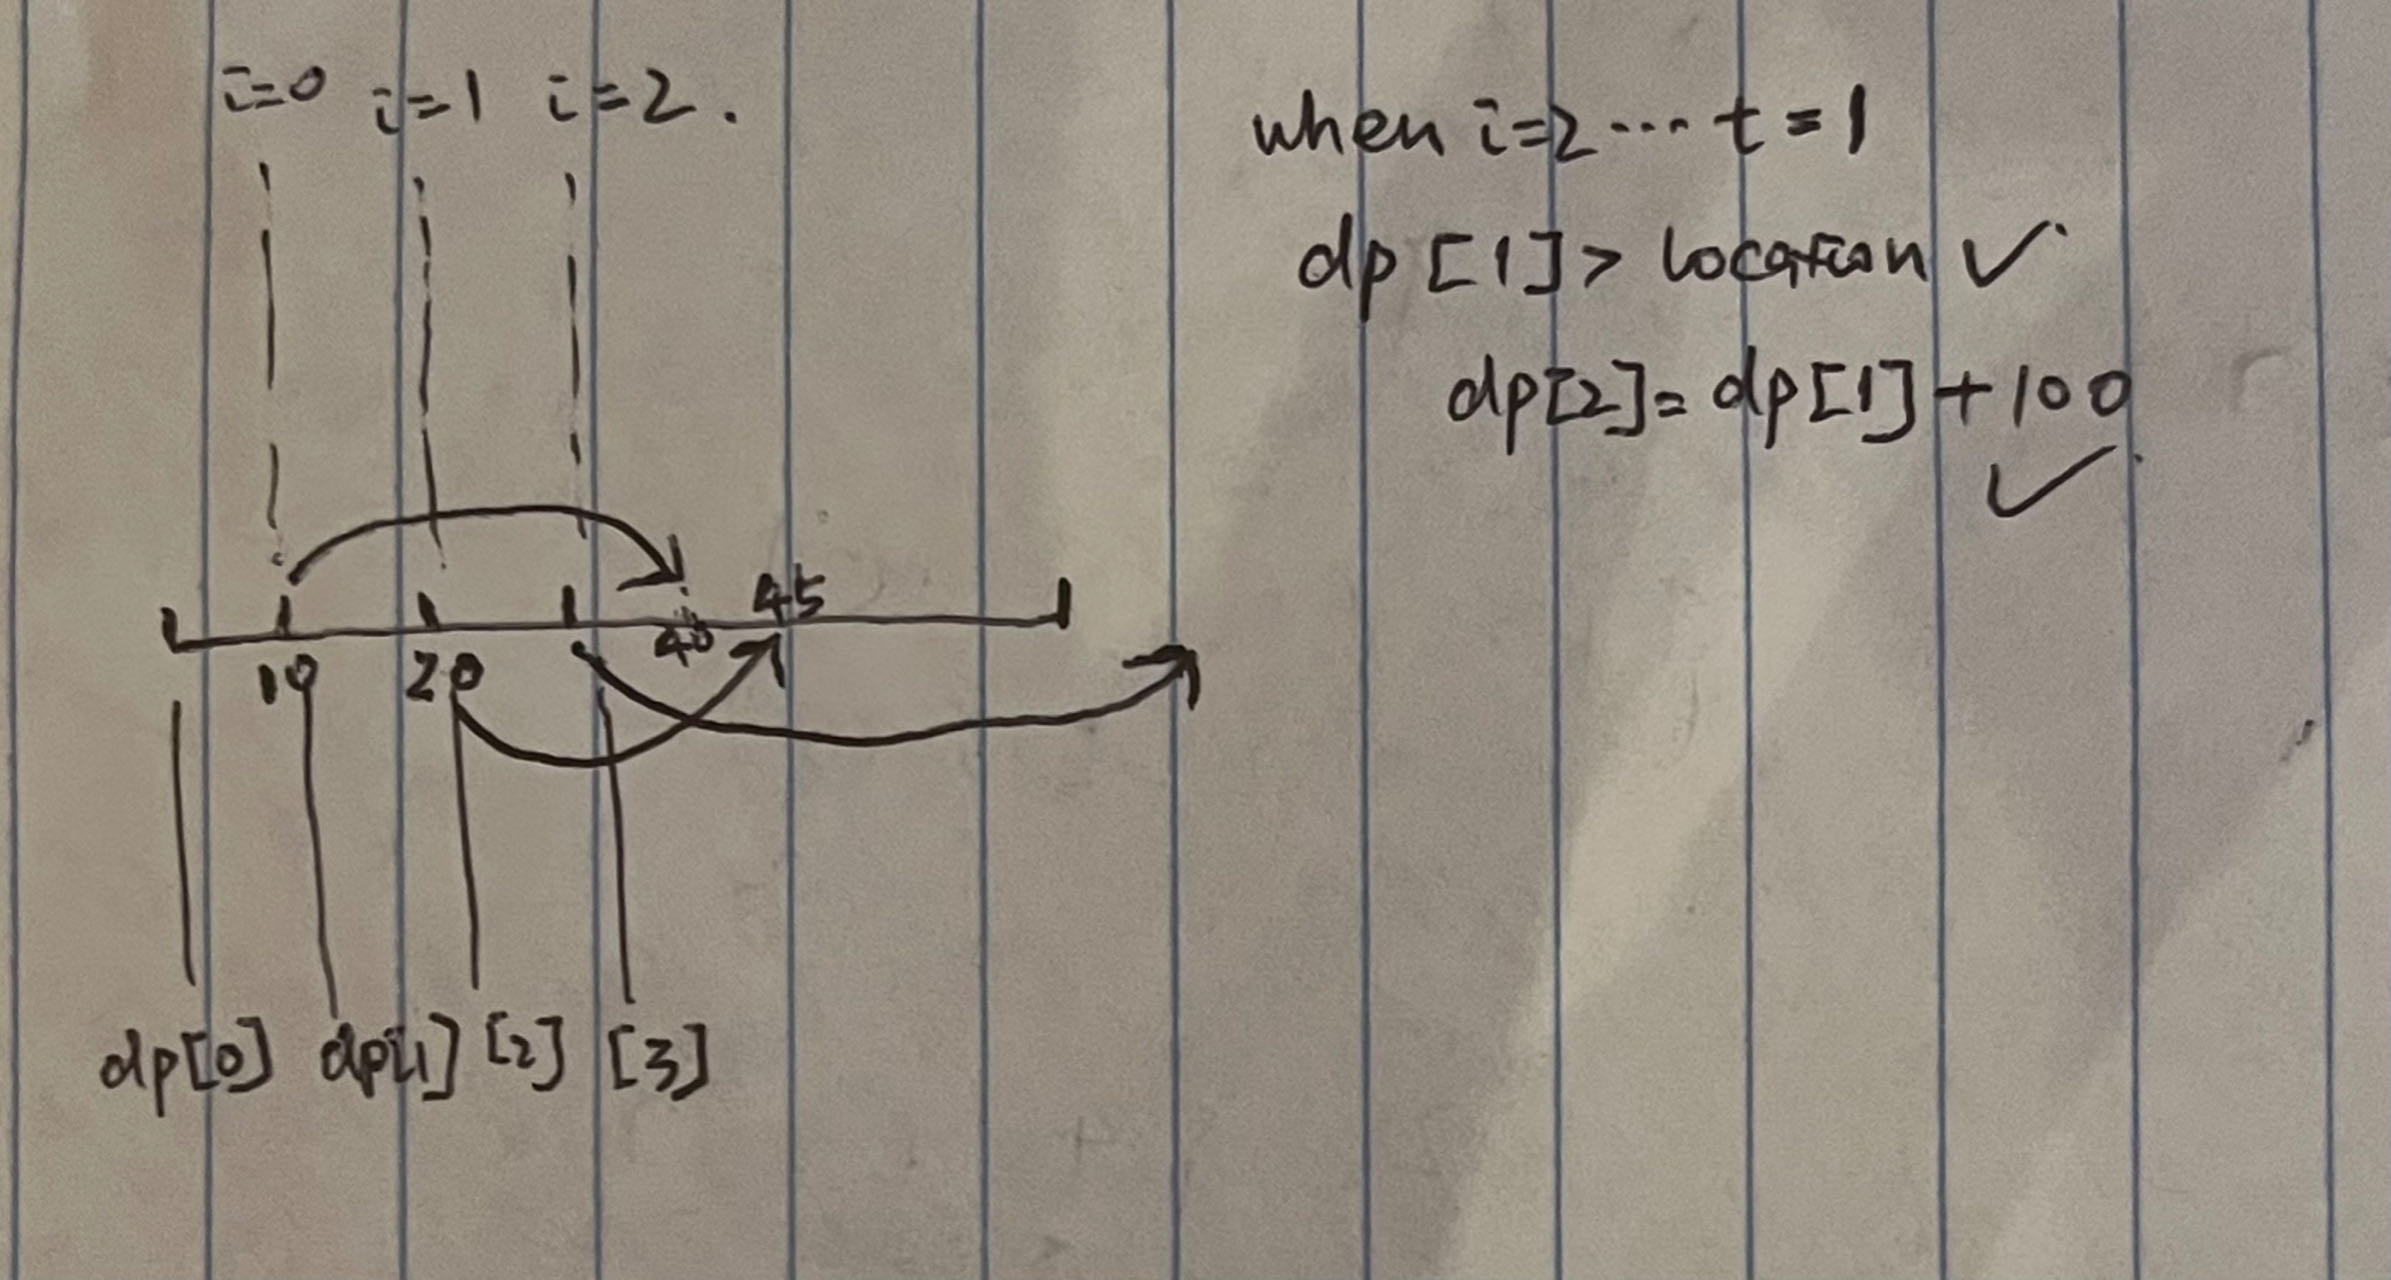

In [1]:
from IPython.display import Image
Image(filename="fuel.jpg",height=500,width=500)